In [12]:
from sklearn import datasets
import pandas as pd

#'../data/df_com_all_2/'+route_name+'_'+i+'_'+str(days_ago)+'.csv'
route_name = "hatoma_route"
dep = "hatoma_dep"
days_ago = 5

df = pd.read_csv('../data/df_com_all_2/'+route_name+'_'+dep+'_'+str(days_ago)+'.csv', header=None)

df = df.dropna(how='any')#.dropna(subset=[1])

import numpy as np
from sklearn.preprocessing import LabelEncoder
#データのロード
X = df.iloc[:,3:12].values
print(X)
y = df.loc[:, 1]#.values
print(y)

[[  6.  154.    0.5 ...   0.5  95.    2. ]
 [  9.  177.    0.5 ...   0.5  94.    4. ]
 [  9.  177.    0.5 ...   0.5  94.    4. ]
 ...
 [ 14.   53.    0.8 ...   1.3  42.    8. ]
 [ 27.   20.    0.8 ...   1.6  19.   20. ]
 [ 25.   17.    0.8 ...   1.3  34.   15. ]]
10      0.0
11      0.0
12      0.0
13      0.0
14      0.0
       ... 
3191    1.0
3192    1.0
3193    1.0
3194    1.0
3195    1.0
Name: 1, Length: 3080, dtype: float64


In [13]:
#データの分割（テスト用とトレーニング用）
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y)
print('Labels counts in y[0 1]:', np.bincount(y))
print('Labels counts in y_train[0 1]:', np.bincount(y_train))
print('Labels counts in y_test[0 1]:', np.bincount(y_test))

Labels counts in y[0 1]: [2693  387]
Labels counts in y_train[0 1]: [2154  310]
Labels counts in y_test[0 1]: [539  77]


In [14]:

#標準化
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
print(X_train_std)

[[-0.12104182 -0.26213059 -0.40611293 ... -0.53030218  0.45012478
  -0.21423311]
 [-0.12104182 -0.07104271 -0.8839841  ... -0.40076271  0.03344557
  -0.05819693]
 [-0.12104182 -0.42774008  0.07175825 ... -0.01214432 -0.776764
   0.09783924]
 ...
 [-1.75080705  0.01813163 -1.12291969 ... -1.30753895 -0.5684244
  -1.77459483]
 [ 1.50872342 -0.3895225   0.54962943 ...  1.80140816 -0.19804288
   1.81423714]
 [-0.12104182 -0.26213059 -0.40611293 ... -0.53030218  0.45012478
  -0.21423311]]


In [15]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

In [18]:
#ランダムフォレスト実行
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini',
                                n_estimators=25, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train_std, y_train)


RandomForestClassifier(n_estimators=25, n_jobs=2, random_state=1)

In [19]:
y_pred = forest.predict(X_test)

[[513  26]
 [ 50  27]]


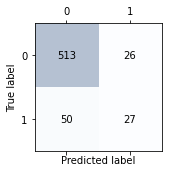

In [27]:
#混同行列
from sklearn.metrics import confusion_matrix

forest.fit(X_train_std, y_train)
y_pred = forest.predict(X_test_std)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()

In [30]:
#適合率、再現率、F1スコア
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

Precision: 0.509
Recall: 0.351
F1: 0.415


In [31]:
print('Test Accuracy: %.3f' % forest.score(X_test_std, y_test))

Test Accuracy: 0.877


In [33]:
import sklearn.metrics as metrics
def accuracy_rate(y_test,y_pred):
    """予測結果から正解率を表示
        Args:
            y_test:
                予測に使用したデータのラベル(目的変数)
            y_pred:
                予測結果
    """
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    auc = metrics.auc(fpr, tpr)
    print("正解率",auc)
accuracy_rate(y_test,y_pred)

正解率 0.6512059369202227
